In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


In [2]:
from hazm import *
from hazm.utils import stopwords_list
import nltk
from sklearn.model_selection import train_test_split


In [3]:
# read data:
df = pd.read_excel("train_data.xlsx")

In [4]:
col = ["message","feeling"]
df.columns = col
df

message feeling
0     عکسی که چند روز پیش گذاشته بودم این فیلم الانش...   OTHER
1     تنهاییم شبیه تنهاییه ظهرای بچگیم شده وقتی که ه...     SAD
2              خوبه تمام قسمت‌های گوشی رو محافظت می‌کنه   HAPPY
3     این خاک مال مردمان است نه حاکمان #ایران #مهسا_...   ANGRY
4                  اگه تو بغلت بودم حالم خیلی بهتر میشد     SAD
...                                                 ...     ...
4918  من از بو و ماندگاریش راضی بودم ، قیمتش هم‌ مناسبه   HAPPY
4919  گاز نداریم آب نداریم برق نداریم نت نداریم پول ...     SAD
4920  یکی بهم گفت برنو چرا عاشق نمیشی گفتم ما پول عا...     SAD
4921  زیادی داریم به قضیه ی گاز میپردازیم فقط فراخوا...   OTHER
4922  سلام. خیلی مواظبت کنید این ویروس کوفتی رو‌ نگی...     SAD

[4923 rows x 2 columns]

In [5]:
# chand class darim
df["feeling"].unique()

array(['OTHER', 'SAD', 'HAPPY', 'ANGRY', 'FEAR'], dtype=object)

In [6]:
# az har class chanda darim
counter = df["feeling"].value_counts()
row = ["HAPPY","OTHER","ANGRY","SAD","FEAR"]
counter

feeling
HAPPY    1462
OTHER    1263
ANGRY    1012
SAD       844
FEAR      342
Name: count, dtype: int64

<BarContainer object of 5 artists>

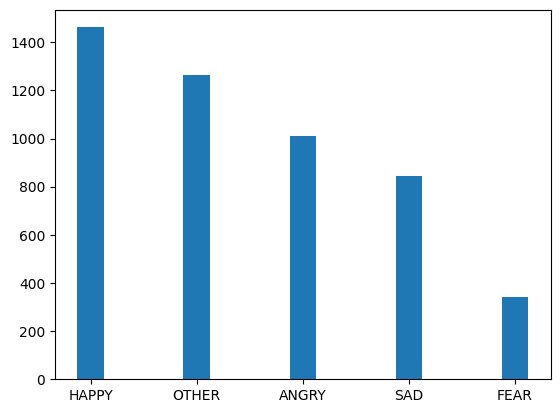

In [7]:
plt.bar(x=row,height = counter,width=0.25)

In [8]:
# class ro tabdil be adad kon
df["feeling"] = df["feeling"].replace({"HAPPY":4,"OTHER":3,"ANGRY":2,"SAD":1,"FEAR":0})


C:\Users\Asus\AppData\Local\Temp\ipykernel_1852\2157220769.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["feeling"] = df["feeling"].replace({"HAPPY":4,"OTHER":3,"ANGRY":2,"SAD":1,"FEAR":0})


In [9]:
# function norm baraye  normal kardan text (az nazr mantegh)
def norm(data_set,index=0,corpus = []):
    nomalize = Normalizer()
    while True:
        sent = data_set["message"][index]
        sent = re.sub("[0-9]","",sent)
        sent = nomalize.normalize(sent)
        sent = word_tokenize(sent)
        corpus.append(sent)
        index = index +1
        if index == data_set.shape[0]:
            break
    return corpus



In [10]:
corpus = norm(df)
len(corpus)

4923

In [11]:
# hazf marker point ha
markers = [".",":","#","...","!","؟","،","…","??"]
def remove_markers(corpus=corpus,markers=markers):
    for i in range(len(corpus)):
        for j in corpus[i]:
            if j in markers:
                corpus[i].remove(j)
    
    return corpus


In [12]:
corpus = remove_markers()
corpus[0]

['عکسی',
 'که',
 'چند',
 'روز',
 'پیش',
 'گذاشته_بودم',
 'این',
 'فیلم',
 'الانشه',
 'وسط',
 'کوه\u200cها',
 'لابه',
 'لای',
 'مه',
 '#تبریز']

In [13]:
# hazf stopword ha
def remove_stopwordes(corpus=corpus,):
    stopwords = stopwords_list()
    for i in range(len(corpus)):
        for j in corpus[i]:
            if j in stopwords:
                corpus[i].remove(j)
    return corpus

corpus = remove_stopwordes()

In [14]:
# tabdil list be array
corpus = np.array(corpus, dtype="object")


In [15]:
data = pd.DataFrame(corpus,columns=["message"])
data["feeling"] = df["feeling"]

In [16]:
# inja bayad corpus as loghat tashkil shode ro be sentence tamdil konim
def make_sent(sentence=[],corpus=corpus):
    sent = ""
    for i in range(len(corpus)):
        for j in corpus[i]:
            sent = sent + j +" "

        sentence.append(sent)
        sent = ""

    return sentence

sentence = make_sent()
sentence

['عکسی چند روز گذاشته_بودم فیلم الانشه وسط کوه\u200cها لابه لای مه #تبریز ',
 'تنهاییم شبیه تنهاییه ظهرای بچگیم وقتی\u200cکه می\u200cخوابیدن من خوابم نمی\u200cبرد آدما اما نبودن ',
 'خوبه قسمت\u200cهای گوشی محافظت می\u200cکنه ',
 'خاک\u200cمال مردمان نه حاکمان #ایران #مهسا_امینی ',
 'اگه بغلت بودم حالم بهتر ',
 'آخوند داره خدا خدا میکنه باز کرونا بیاد اونا دست مردم نجاتشون بده ',
 '۲ / ماموران شرکت گاز رفع نقص مجددا گاز مشترکان وصل ',
 'اصلا نخرید هفته استفاده از کار افتاد ',
 'اصلی\u200cترین ایرادش نسخه قدیمی بلوتوث هستش ',
 'کافر دل نمی\u200cبندی نقاب زلف می\u200cترسم محرابم بگرداند خم دل ستان ابرو ',
 'برعکس گربه\u200cها عاشق بیرونه- - ',
 'گر سیل عالم موج اشتر شود مرغان آبی چه غم غم خورد مرغ هوا ',
 'الاغ اندازه شعور الان پروفسور ',
 'تعطیلی پمپ\u200cهای گاز جایگاه\u200cهای CNG #شیراز ۲۵ دی ۱۴۰۱ ',
 'میگم خوبه داعش نداره ؟! ',
 'شرکت حتی اوج کرونا تعطیل نشد .. هروقت نونوایی\u200cها تعطیل بشن هم تعطیل میشیم ',
 'خوبی کمبود گاز بود امتحانا تعویق افتاد ',
 'ایران من\u200cای جان من- #م

In [17]:
# hala jaygozari sentence to dataframe
def maping(data_set,sentence):
    for i in range(len(data_set["message"])):
        data_set["message"][i] = sentence[i]
    return data_set
data = maping(data,sentence)



C:\Users\Asus\AppData\Local\Temp\ipykernel_1852\817536932.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_set["message"][i] = sentence[i]
C:\Users\Asus\AppData\Local\Temp\ipykernel_1852\817536932.py:4: SettingWithCopyWarning: 
A val

In [18]:
data

message  feeling
0     عکسی چند روز گذاشته_بودم فیلم الانشه وسط کوه‌ه...        3
1     تنهاییم شبیه تنهاییه ظهرای بچگیم وقتی‌که می‌خو...        1
2                     خوبه قسمت‌های گوشی محافظت می‌کنه         4
3          خاک‌مال مردمان نه حاکمان #ایران #مهسا_امینی         2
4                              اگه بغلت بودم حالم بهتر         1
...                                                 ...      ...
4918            از بو ماندگاریش راضی بودم قیمتش مناسبه         4
4919  گاز نداریم آب نداریم برق نداریم نت نداریم پول ...        1
4920  بهم برنو عاشق نمیشی گفتم پول عاشقی کردنو نداری...        1
4921  داریم قضیه‌ی گاز می‌پردازیم فراخوان ۲۹ ۳۰ #مهس...        3
4922        سلام مواظبت این ویروس کوفتی نگیرید پاره ما         1

[4923 rows x 2 columns]

# TFIDF:

In [19]:
#  data matn ro tabdil be adad mikonad
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
bow_tf = tf.fit_transform(data["message"]).toarray()
bow_tf.shape


(4923, 9866)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(bow_tf,data["feeling"],random_state=11,test_size=0.2)

In [21]:
# model Decisintree run it 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_tf = DecisionTreeClassifier()
tree_tf.fit(x_train,y_train)
y_pred = tree_tf.predict(x_test)
acc = accuracy_score(y_true=y_test,y_pred=y_pred)
acc


0.5086294416243655

In [22]:
#  bedast avardan hyper paramaters
from sklearn.model_selection import GridSearchCV
params = {"max_depth":(5,20,),"criterion":("gini","entropy",),"max_features":(None,"sqrt","log2",5,7.0,)}
cv = GridSearchCV(tree_tf,params)
cv.fit(x_train,y_train)

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'), 'max_depth': (5, 20),
                         'max_features': (None, 'sqrt', 'log2', 5, 7.0)})

# vector count

In [23]:
# ravesh 2 tabdil matn be adad bi vector count
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bow_vec= cv.fit_transform(data["message"]).toarray()

len(bow_vec)

4923

In [24]:
x_train,x_test,y_train,y_test = train_test_split(bow_vec,data["feeling"],random_state=11,test_size=0.2)

In [25]:
# fit model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_vec = DecisionTreeClassifier()
tree_vec.fit(x_train,y_train)
y_pred = tree_vec.predict(x_test)
acc = accuracy_score(y_true=y_test,y_pred=y_pred)
acc

0.531979695431472

In [26]:
# hyper params
from sklearn.model_selection import GridSearchCV
params = {"max_depth":(None,20,),"criterion":("gini","entropy",),"max_features":(None,"sqrt","log2",5,7.0,)}
cv = GridSearchCV(tree_vec,params)
cv.fit(x_train,y_train)
# best score in this model:
print(cv.best_score_)

KeyboardInterrupt: 

In [27]:
# naive base model:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_true=y_test,y_pred=y_pred)

0.5644670050761421

In [28]:
# random  forest model:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500)
forest.fit(x_train,y_train)
y_pred = forest.predict(x_test)
accuracy_score(y_true=y_test,y_pred=y_pred)

0.550253807106599

# DEEP LEARNING

In [29]:
data

message  feeling
0     عکسی چند روز گذاشته_بودم فیلم الانشه وسط کوه‌ه...        3
1     تنهاییم شبیه تنهاییه ظهرای بچگیم وقتی‌که می‌خو...        1
2                     خوبه قسمت‌های گوشی محافظت می‌کنه         4
3          خاک‌مال مردمان نه حاکمان #ایران #مهسا_امینی         2
4                              اگه بغلت بودم حالم بهتر         1
...                                                 ...      ...
4918            از بو ماندگاریش راضی بودم قیمتش مناسبه         4
4919  گاز نداریم آب نداریم برق نداریم نت نداریم پول ...        1
4920  بهم برنو عاشق نمیشی گفتم پول عاشقی کردنو نداری...        1
4921  داریم قضیه‌ی گاز می‌پردازیم فراخوان ۲۹ ۳۰ #مهس...        3
4922        سلام مواظبت این ویروس کوفتی نگیرید پاره ما         1

[4923 rows x 2 columns]

In [30]:
# in deep learning tandil matn be adad
from tensorflow.keras.preprocessing.text import one_hot

encoded = [one_hot(sent,500) for sent in data["message"]]
encoded

[[235, 326, 312, 26, 277, 481, 251, 336, 474, 459, 2, 454, 214],
 [149, 407, 429, 338, 18, 270, 331, 53, 297, 454, 129, 170, 250],
 [290, 32, 449, 179, 432],
 [33, 246, 488, 470, 182, 262, 62],
 [145, 203, 277, 358, 448],
 [140, 405, 68, 68, 36, 382, 235, 357, 242, 168, 397, 294, 393],
 [18, 161, 234, 135, 498, 402, 306, 135, 281, 170],
 [441, 379, 283, 433, 144, 407, 446],
 [370, 205, 248, 85, 60, 322],
 [29, 110, 154, 128, 322, 306, 417, 127, 305, 110, 328, 81],
 [478, 306, 177, 82],
 [282, 385, 187, 30, 269, 187, 399, 330, 184, 186, 186, 229, 125, 369],
 [139, 134, 362, 354, 154],
 [460, 366, 135, 101, 446, 75, 187, 448, 230],
 [174, 290, 40, 384, 331],
 [234, 475, 68, 235, 399, 165, 15, 117, 399, 382, 103, 399, 465],
 [382, 417, 135, 163, 80, 186, 446],
 [182, 53, 230, 53, 262, 62],
 [345, 306, 71, 297, 49],
 [277, 166, 302, 101, 262, 336, 315, 113, 40, 432, 270, 99],
 [75, 166, 136, 251, 425, 287, 23, 331],
 [43, 303, 494, 472, 134, 53, 179, 336, 380, 281],
 [72, 426, 481, 458, 12

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_lengh = 13


In [32]:
from tensorflow.keras.layers import Embedding,Dense,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


In [33]:
# preprocessing data:
token = Tokenizer()
token.fit_on_texts(data["message"])
sequence = token.texts_to_sequences(data["message"])
encoded = pad_sequences(sequence,maxlen=13,padding="pre")
cat_lab = to_categorical(data["feeling"],num_classes=5)

In [34]:
x_train,x_test,y_train,y_test = train_test_split(encoded,cat_lab,random_state=11,test_size=0.2)

In [35]:
# creat model:
model = Sequential()
model.add(Embedding(14500,input_length=13,output_dim=13))
model.add(LSTM(256))
model.add(Dense(5,activation="softmax"))

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [36]:
# compile and fit model:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=7)

Epoch 1/7
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.3099 - loss: 1.5010
Epoch 2/7
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4705 - loss: 1.2337
Epoch 3/7
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6113 - loss: 0.9487
Epoch 4/7
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7383 - loss: 0.7160
Epoch 5/7
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7987 - loss: 0.5304
Epoch 6/7
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8745 - loss: 0.3507
Epoch 7/7
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8941 - loss: 0.3143


In [37]:
# give acc score but we must give the labels:
def acc(prediction,test,y_test=[],y_pred=[]):
    for i in range(len(prediction)):
        max_index = max(prediction[i])
        index = 0
        for j in prediction[i]:
            if j  == max_index:
                y_pred.append(index)
            else:
                index += 1

    for k in range(len(test)):
        max_index = max(test[i])
        index = 0
        for j in test[k]:
            if j == max_index:
                y_test.append(index)
            else:
                index += 1
    
    return accuracy_score(y_true=y_test,y_pred=y_pred)





In [38]:
# train and valid
for i in range(7):
    x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.2)
    y_pred = model.predict(x_valid)
    print(acc(y_pred,y_valid))

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
0.950507614213198
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0.9569816643159379
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0.9588969823100937
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
0.9595872742906277
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0.9580973952434881
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0.9566563467492261
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
0.9563262684649968


In [39]:
y_pred = model.predict(x_test)
acc(y_pred,y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


0.8389851183215419

# test data set:

In [40]:
test_data = pd.read_csv("3rdHW_test.csv")
test_data.columns = ["message"]
test_data

message
0           بسیار نرم و لطیف بوده و کیفیت بالایی داره.
1        اصلا رنگش با چیزی که تو عکس بود خیلی فرق داشت
2              خیلی زیبا و ب اندازه و با دقت طراحی شده
3    سبزی پلو با ماهی مال عید نوروزه، امشب سوشی میخ...
4             لج بازیو بذار کنار یه فرصت دیگه بهت میدم
..                                                 ...
542            سرخط خبرهای ۶ عصر، پنجشنبه ۲۹ جدی ۱۴۰۱ 
543    بوی عالی  ماندگاری خوب خیلی خوشم امدش مرسی دیجی
544                 گاز که نداریم اینترنت هم روش? #وطن
545    من چندتاشو برا مغازه گرفتم باطریاشون کلا خرابن!
546    خیلی بی کیفیت \nحتی بچه ها هم باهاش بازی نمیکنن

[547 rows x 1 columns]

In [41]:
# preprocessing data set norm the first
corpus_test = norm(test_data)
corpus_test[0]

['عکسی',
 'چند',
 'روز',
 'گذاشته_بودم',
 'فیلم',
 'الانشه',
 'وسط',
 'کوه\u200cها',
 'لابه',
 'لای',
 'مه',
 '#تبریز']

In [42]:
# tamame kar haie ke ro df kardim inja piade mikonim
corpus_test = remove_markers(corpus=corpus_test)
corpus_test[0]

['عکسی',
 'چند',
 'روز',
 'گذاشته_بودم',
 'فیلم',
 'الانشه',
 'وسط',
 'کوه\u200cها',
 'لابه',
 'لای',
 'مه',
 '#تبریز']

In [43]:
corpus_test = remove_stopwordes(corpus=corpus_test)
corpus_test[0]

['عکسی',
 'روز',
 'گذاشته_بودم',
 'فیلم',
 'الانشه',
 'وسط',
 'کوه\u200cها',
 'لابه',
 'لای',
 'مه',
 '#تبریز']

In [44]:
corpus_test = np.array(corpus_test, dtype="object")
corpus_test

array([list(['عکسی', 'روز', 'گذاشته_بودم', 'فیلم', 'الانشه', 'وسط', 'کوه\u200cها', 'لابه', 'لای', 'مه', '#تبریز']),
       list(['تنهاییم', 'شبیه', 'تنهاییه', 'ظهرای', 'بچگیم', 'وقتی\u200cکه', 'می\u200cخوابیدن', 'خوابم', 'نمی\u200cبرد', 'آدما', 'نبودن']),
       list(['خوبه', 'قسمت\u200cهای', 'گوشی', 'محافظت', 'می\u200cکنه']),
       ..., list(['گاز', 'نداریم', 'اینترنت', 'روش', '?', '#وطن']),
       list(['چندتاشو', 'برا', 'مغازه', 'گرفتم', 'باطریاشون', 'کلا', 'خرابن']),
       list(['بی\u200cکیفیت', 'بچه\u200cها', 'باهاش', 'بازی', 'نمیکنن'])],
      dtype=object)

In [45]:
corpus_test = make_sent(corpus=corpus_test,sentence=[])
len(corpus_test)

5470

# TFIDF

In [46]:
len(corpus)

4923

In [47]:
# inja dobare hammon ghesmat df ro fitr mikonim ba in tafavot ke shape on ba shape test barabar ast
corpus_test = tf.fit_transform(corpus_test).toarray()
corpus_test.shape

(5470, 10432)

In [48]:
# hamgam sazi shape
bow_tf.shape
hamgam = np.zeros((4923,10432-9866))
bow_tf = np.concatenate((bow_tf,hamgam),axis=1)

In [49]:
bow_tf.shape

(4923, 10432)

In [50]:
from sklearn.tree import DecisionTreeClassifier
tree_tf = DecisionTreeClassifier()
tree_tf.fit(bow_tf,data["feeling"])


DecisionTreeClassifier()

In [51]:
y_test_pred = tree_tf.predict(corpus_test)
y_test_pred

array([3, 1, 4, ..., 3, 3, 3], dtype=int64)

# vectorsize

In [52]:
cv = CountVectorizer()
bow_vec= cv.fit_transform(data["message"]).toarray()

bow_vec.shape
bow_vec = np.concatenate((bow_vec,hamgam),axis=1)
bow_vec.shape

(4923, 10432)

In [53]:
tree_vec = DecisionTreeClassifier()
tree_vec.fit(bow_vec,data["feeling"])

DecisionTreeClassifier()

In [54]:
y_test_pred = tree_vec.predict(corpus_test)

In [55]:
y_test_pred

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [56]:
clf = MultinomialNB()
clf.fit(bow_vec,data["feeling"])
y_pred = clf.predict(corpus_test)

In [57]:
y_pred

array([3, 3, 2, ..., 4, 2, 4], dtype=int64)